# K-Nearest Neighbors

In this project, I explore the KNN algorithm on data from the Dram Shop, a local business in Missoula, Montana. This dataset contains records based on the customers' habits and consumer behaviors. 

### Goal for Project : 
* Determine a distance metric between customers
* Utilize metrics to implement a k-nearest neighbor algorithm 
* Check final output accuracy 

The file `knn-testing-data.txt` holds data with the segments removed. In this file, I apply segments using the KNN algorithm. 

Using the `testing-true-values.txt` file, I measure my accuracy. 

# Import Libraries and Packages

In [36]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

from statistics import mode
from math import sqrt
from sklearn.metrics import classification_report, confusion_matrix

# Read in the Dataset 

In [2]:
#target contains segements
dt = pd.read_csv("knn-training-data.txt", sep = "\t")

In [3]:
#we do need these unique ids we have index
dt = dt.drop(['customer_id','most_popular_category'], axis = 1)

In [41]:
#Previewing the dataset after dropping categorical information
dt.head()

,relationship_days,total_spend,beverage_categories,segment,distance
0,240,230.75,9,explorer,301.454184
1,218,117.50,3,explorer,316.228260
2,139,105.50,4,explorer,283.045601
3,748,18.00,1,cheapo,780.392890
4,743,404.50,6,loyal core,759.882762


# Creat Training set

In [5]:
train = dt
cols = ['explorer', 'cheapo', 'loyal core', 'newbie']
train.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3 })
train['distance'] = '9999'
train.head()

,relationship_days,total_spend,beverage_categories,segment,distance
0,240,230.75,9,explorer,9999
1,218,117.50,3,explorer,9999
2,139,105.50,4,explorer,9999
3,748,18.00,1,cheapo,9999
4,743,404.50,6,loyal core,9999


In [6]:
#target in the form of a data frame. It is our unknown target we are trying to define using KNN
target = pd.Series([36, 240, 230.75, 9])
target

0     36.00
1    240.00
2    230.75
3      9.00
dtype: float64

In [8]:
#using the euclidean distance formula to calc the distance from target item
train['distance'] = ((train.loc[:,'relationship_days']-target[0])**2 + (train.loc[:,'total_spend']-target[1])**2 + (train.loc[:,'beverage_categories']-target[2])**2)** 0.5

#print every 10th
train.loc[::10]

,relationship_days,total_spend,beverage_categories,segment,distance
0,240,230.75,9,explorer,301.454184
10,338,37.00,2,newbie,429.813404
20,542,56.75,4,cheapo,583.979559
30,412,31.00,5,cheapo,485.818961
40,119,157.00,8,explorer,251.784754
...,...,...,...,...,...
16050,517,40.50,2,cheapo,568.759890
16060,976,132.00,6,loyal core,972.510443
16070,363,332.00,7,loyal core,406.764136
16080,112,20.00,2,newbie,326.347303


In [9]:
train.sort_values('distance', ascending = True).head()

,relationship_days,total_spend,beverage_categories,segment,distance
15725,103,231.25,12,explorer,228.947865
7301,109,237.50,13,explorer,229.674362
1342,108,261.25,12,explorer,231.272837
2877,101,219.00,9,explorer,232.032460
12017,116,228.50,12,explorer,233.203372


In [10]:
k = 7
train = train.sort_values('distance', ascending = True)
knn = list(train.head(k).segment)
knn

['explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer']

In [42]:
print(mode(knn))

explorer


In [13]:
k = 7
train = train.sort_values('distance', ascending = True)
knn = list(train.head(k).segment)
knn

['explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer']

# Read in Testing Data

In [14]:
testing = pd.read_csv("knn-testing-data.txt", sep = "\t")

In [15]:
testing['prediction'] = ''

In [17]:
testing.head()

,customer_id,most_popular_category,relationship_days,total_spend,beverage_categories,prediction
0,", 9GT0P908DS5VGJYRYG4CHAPSQG",sour,224,145.0,5,
1,", D74N0TBT7D2K6YPYDA734V56Y4",seasonal,272,152.5,5,
2,", XHN902RSGS7V6ZBWN7FE5QVGA4",ipa,371,55.0,3,
3,", YDZ8kOpLlCLDlmom",softgoods,609,159.0,6,
4,-uNXHhkiA5JEebdj,tasting/event,802,107.0,8,


### Creating a customer to test on

In [18]:
this_cust = testing.iloc[0,:]

In [19]:
train['distance'] = ((train.loc[:,'relationship_days']-this_cust[2])**2 + (train.loc[:,'total_spend']-this_cust[3])**2 + (train.loc[:,'beverage_categories']-this_cust[4])**2)** 0.5



In [20]:
#Let's look at their features
this_cust

customer_id              , 9GT0P908DS5VGJYRYG4CHAPSQG
most_popular_category                            sour
relationship_days                                 224
total_spend                                     145.0
beverage_categories                                 5
prediction                                           
Name: 0, dtype: object

In [21]:
#previewing dataset on distance
train.sort_values('distance', ascending = True).head()

,relationship_days,total_spend,beverage_categories,segment,distance
321,224,144.00,4,explorer,1.414214
2407,224,146.00,2,explorer,3.162278
1823,223,148.00,5,explorer,3.162278
5667,227,140.75,6,explorer,5.297405
11612,222,149.50,7,explorer,5.315073


In [22]:
k = 7
train = train.sort_values('distance', ascending = True)
knn = list(train.head(k).segment)
knn

['explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer',
 'explorer']

In [23]:
print(mode(knn))

explorer


# Test prediction on row of dataset

In [24]:
k = 7

prediction = mode(train.sort_values('distance', ascending = True).head(k).segment)

In [25]:
testing.iloc[0,5] = prediction

In [26]:
testing.head()

,customer_id,most_popular_category,relationship_days,total_spend,beverage_categories,prediction
0,", 9GT0P908DS5VGJYRYG4CHAPSQG",sour,224,145.0,5,explorer
1,", D74N0TBT7D2K6YPYDA734V56Y4",seasonal,272,152.5,5,
2,", XHN902RSGS7V6ZBWN7FE5QVGA4",ipa,371,55.0,3,
3,", YDZ8kOpLlCLDlmom",softgoods,609,159.0,6,
4,-uNXHhkiA5JEebdj,tasting/event,802,107.0,8,


# For Loop Runs Entire Prediction Through Dataset
This is an alternative way than just creating a column. This way is a safer option. 

In [27]:
k = 25

for row_idx in range(testing.shape[0]) : 
    this_cust = testing.iloc[row_idx,:]
    train['distance'] = ((train.loc[:,'relationship_days']-this_cust[2])**2 + (train.loc[:,'total_spend']-this_cust[3])**2 + (train.loc[:,'beverage_categories']-this_cust[4])**2)** 0.5



    prediction = mode(train.sort_values('distance', ascending = True).head(k).segment)
    
    testing.iloc[row_idx,5] = prediction
    



In [43]:
#Looks like the prediction is filled out
testing.head()

,customer_id,most_popular_category,relationship_days,total_spend,beverage_categories,prediction,segment
0,", 9GT0P908DS5VGJYRYG4CHAPSQG",sour,224,145.0,5,explorer,explorer
1,", D74N0TBT7D2K6YPYDA734V56Y4",seasonal,272,152.5,5,explorer,explorer
2,", XHN902RSGS7V6ZBWN7FE5QVGA4",ipa,371,55.0,3,cheapo,cheapo
3,", YDZ8kOpLlCLDlmom",softgoods,609,159.0,6,loyal core,loyal core
4,-uNXHhkiA5JEebdj,tasting/event,802,107.0,8,loyal core,loyal core


In [29]:
testing.value_counts("prediction")

prediction
newbie        562
loyal core    516
cheapo        451
explorer      260
dtype: int64

## Checking Accuracy
In this project, our professor provided a dataset with segments and customers so we could check the accuracy of our algorithm. 

In [30]:
evaluation = pd.read_csv("testing-true-values.txt", sep = "\t")

In [31]:
evaluation.head()

,customer_id,segment
0,", 9GT0P908DS5VGJYRYG4CHAPSQG",explorer
1,", D74N0TBT7D2K6YPYDA734V56Y4",explorer
2,", XHN902RSGS7V6ZBWN7FE5QVGA4",cheapo
3,", YDZ8kOpLlCLDlmom",loyal core
4,-uNXHhkiA5JEebdj,loyal core


# Merged together "true" DF to Test Accuracy

In [32]:
testing = testing.merge(evaluation, on="customer_id")

In [33]:
testing.head()

,customer_id,most_popular_category,relationship_days,total_spend,beverage_categories,prediction,segment
0,", 9GT0P908DS5VGJYRYG4CHAPSQG",sour,224,145.0,5,explorer,explorer
1,", D74N0TBT7D2K6YPYDA734V56Y4",seasonal,272,152.5,5,explorer,explorer
2,", XHN902RSGS7V6ZBWN7FE5QVGA4",ipa,371,55.0,3,cheapo,cheapo
3,", YDZ8kOpLlCLDlmom",softgoods,609,159.0,6,loyal core,loyal core
4,-uNXHhkiA5JEebdj,tasting/event,802,107.0,8,loyal core,loyal core


## Overview of Accuracy

In [37]:
print(confusion_matrix(testing.prediction, testing.segment))

[[444   0   7   0]
 [  0 258   1   1]
 [  0   3 513   0]
 [  0   1   0 561]]


In [38]:
print(classification_report(testing.prediction, testing.segment))


              precision    recall  f1-score   support

      cheapo       1.00      0.98      0.99       451
    explorer       0.98      0.99      0.99       260
  loyal core       0.98      0.99      0.99       516
      newbie       1.00      1.00      1.00       562

    accuracy                           0.99      1789
   macro avg       0.99      0.99      0.99      1789
weighted avg       0.99      0.99      0.99      1789



# Scatter Plot of Predicted Segmentation vs. True Segments 

Text(0.5, 1.0, 'Dram Data Predicited Segmentation Scatter Plot')

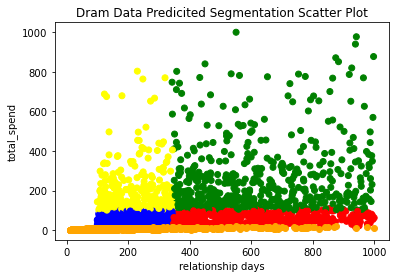

In [39]:
colors = {'cheapo':'red', 'newbie':'blue', 'explorer':'yellow', 'loyal core':'green' }

plt.scatter(
    testing['relationship_days'],
    testing['total_spend'],
    c = testing['prediction'].map(colors))
plt.scatter(testing['total_spend'], testing['beverage_categories'], c='orange')
plt.xlabel('relationship days')
plt.ylabel('total_spend')
plt.title('Dram Data Predicited Segmentation Scatter Plot')

Text(0.5, 1.0, 'Dram Data True Segmentation Scatter Plot')

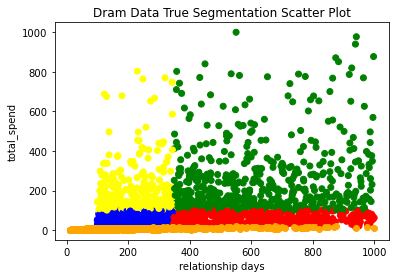

In [40]:
colors = {'cheapo':'red', 'newbie':'blue', 'explorer':'yellow', 'loyal core':'green' }

plt.scatter(
    testing['relationship_days'],
    testing['total_spend'],
    c = testing['segment'].map(colors))
plt.scatter(testing['total_spend'], testing['beverage_categories'], c='orange')
plt.xlabel('relationship days')
plt.ylabel('total_spend')
plt.title('Dram Data True Segmentation Scatter Plot')